In [207]:
## Prep the workspace
library("AzureML")
ws <- workspace()

## load the data: 2013 arrests by county and agency; county pop by race and gender
dat_arrests <- download.datasets(ws, "ca_doj_arrests_deidentified_2014_05-07-2016.csv")
dat_pop <- download.datasets(ws, "ca_county_population_by_race_gender_age_2005-2014_02-05-2016.csv")

In [208]:
## Preview the arrests data
dim(dat_arrests)
names(dat_arrests)
head(dat_arrests)

[1] 1212845      16

[1] "county"                   "agency_name"             
 [3] "agency_code"              "arrest_year"             
 [5] "arrest_month"             "arrest_day"              
 [7] "race_or_ethnicity"        "gender"                  
 [9] "age_group"                "summary_offense_level"   
[11] "offense_level"            "bcs_offense_code"        
[13] "bcs_summary_offence_code" "fbi_offense_code"        
[15] "status_type"              "disposition"

,county,agency_name,agency_code,arrest_year,arrest_month,arrest_day,race_or_ethnicity,gender,age_group,summary_offense_level,offense_level,bcs_offense_code,bcs_summary_offence_code,fbi_offense_code,status_type,disposition
1,Alameda,Alameda Co. Sheriff's Department,0100,2014,1,1,Black,male,adult,misdemeanor,misdemeanor,856,51,21,booked,misdemeanor complaint sought
2,Alameda,Alameda Co. Sheriff's Department,0100,2014,1,1,Hispanic,male,adult,misdemeanor,misdemeanor,856,51,21,booked,misdemeanor complaint sought
3,Alameda,Alameda Co. Sheriff's Department,0100,2014,1,1,Hispanic,male,adult,misdemeanor,misdemeanor,397,30,08,booked,misdemeanor complaint sought
4,Alameda,Alameda Co. Sheriff's Department,0100,2014,1,1,Black,female,adult,felony,felony,993,25,26,booked,felony complaint sought
5,Alameda,Alameda Co. Sheriff's Department,0100,2014,1,1,Black,male,adult,felony,felony,825,14,18H,booked,felony complaint sought
6,Alameda,Alameda Co. Sheriff's Department,0100,2014,1,1,White,female,adult,misdemeanor,misdemeanor,98,59,26,booked,misdemeanor complaint sought


In [209]:
## Load necessary libraries
library(dplyr)
library(ggplot2)
library(grid)
library(stats)

In [210]:
## Subset arrests to only juveniles.
dat_juv <- dat_arrests[dat_arrests$age_group %in% "juvenile",]

## Group by county, then by year, then by race/ethnicity and give me the counts.
cty_ethnic <- summarise(group_by(dat_juv, county, arrest_year, race_or_ethnicity), total = n())

## Now remove those records supressed due to privacy concern.
cty_ethnic <- cty_ethnic[!(cty_ethnic$race_or_ethnicity %in% "suppressed_due_to_privacy_concern"),]

#### !! Some counties are reporting only "NA"s in their arrest totals per ethnic group. :-\
## Let's remove those from our analysis...for now.
cty_ethnic <- cty_ethnic[!is.na(cty_ethnic$total),]

## Preview
dim(cty_ethnic)
head(cty_ethnic)
tail(cty_ethnic)

[1] 168   4

,county,arrest_year,race_or_ethnicity,total
1,Alameda,2014,Asian/Pacific Islander,136
2,Alameda,2014,Black,1011
3,Alameda,2014,Hispanic,702
4,Alameda,2014,Other,80
5,Alameda,2014,White,323
6,Butte,2014,Asian/Pacific Islander,8


,county,arrest_year,race_or_ethnicity,total
1,Ventura,2014,White,573
2,Yolo,2014,Asian/Pacific Islander,8
3,Yolo,2014,Black,32
4,Yolo,2014,Hispanic,108
5,Yolo,2014,Other,5
6,Yolo,2014,White,117


In [211]:
## Panel bar charts: ethnic breakdown of arrests, by county.
## NOTE: this is before normalizing by ethnic population.
plot_ethnic <- ggplot(cty_ethnic, aes(x = race_or_ethnicity, y = total, fill = race_or_ethnicity)) + 
                geom_bar(stat = "identity") + coord_flip() + facet_wrap(~county) +  
                theme(axis.text.x=element_text(angle=-90,hjust=1,vjust=0.5, size = 8), axis.text.x=element_text(size = 8),
                      legend.position = "none", strip.text=element_text(size = 8), axis.title.x=element_blank(),
                      axis.title.y=element_blank()) +
                ggtitle("Ethnic Breakdown of Arrest Freq. by County")

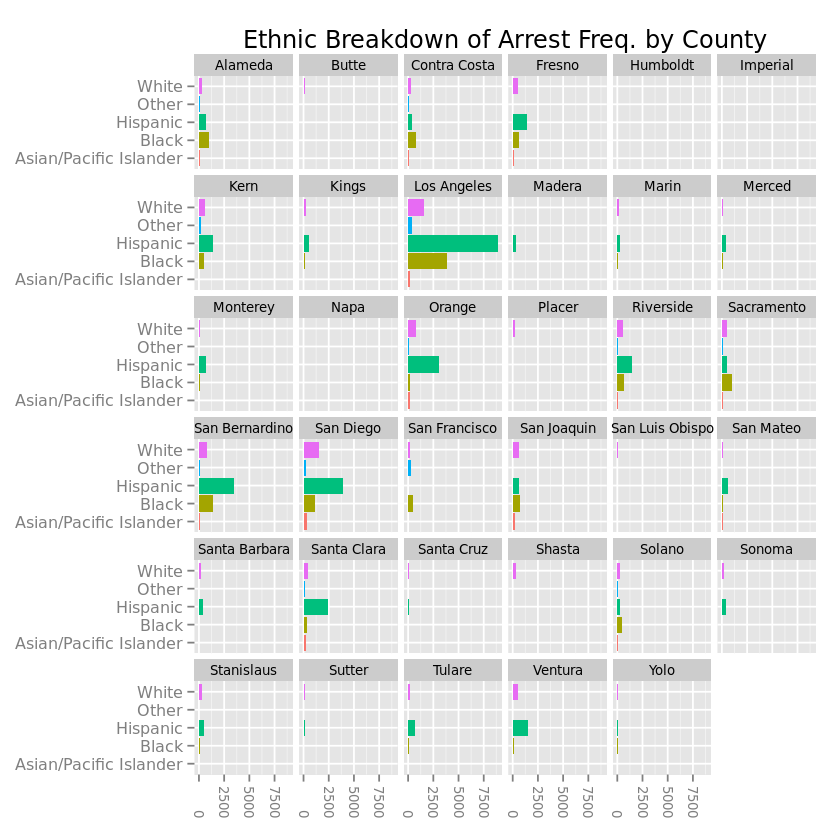

In [212]:
plot_ethnic

In [213]:
## Stacked bar chart: ethnic breakdown of arrests, stacked between counties.
## Again, this is before normalizing by ethnic population.
plot_ethnic2 <- ggplot(cty_ethnic, aes(x = race_or_ethnicity, y = total, fill = county)) + 
                geom_bar(stat = "identity") + coord_flip() + 
                theme(axis.text.x=element_text(angle=-90,hjust=1,vjust=0.5, size = 8), axis.text.x=element_text(size = 8),
                      strip.text=element_text(size = 8), axis.title.x=element_blank(), axis.title.y=element_blank(),
                      legend.text=element_text(size= 6), legend.key.height=unit(.4, "cm")) +
                ggtitle("Cumulative Ethnic Breakdown of Arrests by County")

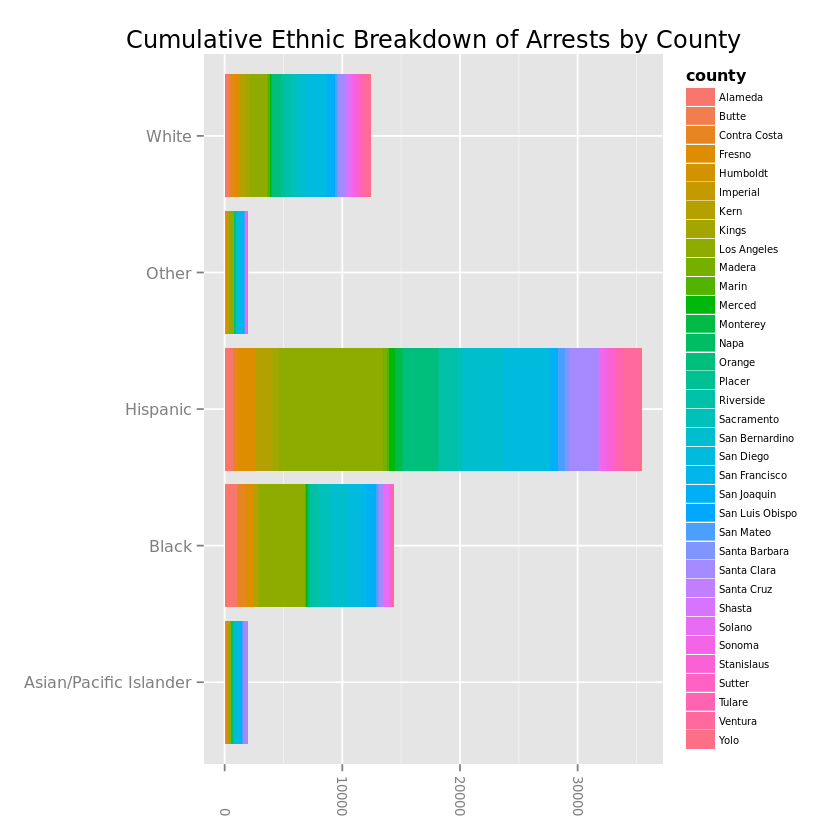

In [214]:
plot_ethnic2

In [215]:
## Now, let's preview the population data
dim(dat_pop)
names(dat_pop)
head(dat_pop)
tail(dat_pop)

[1] 148680      6

[1] "year"       "county"     "race"       "gender"     "age_group" 
[6] "population"

,year,county,race,gender,age_group,population
1,2005,Alameda,All Combined,All Combined,All Combined,1459881
2,2005,Alameda,All Combined,All Combined,Juvenile,354877
3,2005,Alameda,All Combined,All Combined,Adult,1105004
4,2005,Alameda,All Combined,All Combined,0-9,192318
5,2005,Alameda,All Combined,All Combined,10-14,101688
6,2005,Alameda,All Combined,All Combined,15-17,60871


,year,county,race,gender,age_group,population
148675,2014,Yuba,Other,Male,18-24,235
148676,2014,Yuba,Other,Male,25-29,102
148677,2014,Yuba,Other,Male,30-39,210
148678,2014,Yuba,Other,Male,40-49,154
148679,2014,Yuba,Other,Male,50-59,142
148680,2014,Yuba,Other,Male,60+,148


In [216]:
## Looks like it's already aggregated along a number of dimensions. 
## Let's subset only the juveniles.
dat_pop_jv <- dat_pop[dat_pop$age_group %in% "Juvenile",]
head(dat_pop_jv)

,year,county,race,gender,age_group,population
2,2005,Alameda,All Combined,All Combined,Juvenile,354877
14,2005,Alameda,All Combined,Female,Juvenile,173570
26,2005,Alameda,All Combined,Male,Juvenile,181307
38,2005,Alameda,Hispanic,All Combined,Juvenile,103616
50,2005,Alameda,Hispanic,Female,Juvenile,50726
62,2005,Alameda,Hispanic,Male,Juvenile,52890


In [217]:
## Ok, now, let's look at arrests of both genders and ignore the 'all combined' county value.
dat_pop_jv <- dat_pop_jv[dat_pop_jv$gender %in% "All Combined" & !(dat_pop_jv$county %in% "All Combined"),]

## Let's also remove the race 'all combined.'
dat_pop_jv <- dat_pop_jv[!(dat_pop_jv$race %in% "All Combined"),]

head(dat_pop_jv[dat_pop_jv$year %in% "2014",])
tail(dat_pop_jv[dat_pop_jv$year %in% "2014",])

,year,county,race,gender,age_group,population
133850,2014,Alameda,Hispanic,All Combined,Juvenile,107250
133886,2014,Alameda,Black,All Combined,Juvenile,38223
133922,2014,Alameda,White,All Combined,Juvenile,81270
133958,2014,Alameda,Asian/Pacific Islander,All Combined,Juvenile,89431
133994,2014,Alameda,Native American,All Combined,Juvenile,783
134030,2014,Alameda,Other,All Combined,Juvenile,26088


,year,county,race,gender,age_group,population
148466,2014,Yuba,Hispanic,All Combined,Juvenile,7234
148502,2014,Yuba,Black,All Combined,Juvenile,568
148538,2014,Yuba,White,All Combined,Juvenile,10187
148574,2014,Yuba,Asian/Pacific Islander,All Combined,Juvenile,1506
148610,2014,Yuba,Native American,All Combined,Juvenile,307
148646,2014,Yuba,Other,All Combined,Juvenile,1552


In [218]:
## Looks like we'll have to do some recoding/classification, if we want to look at
## Native American, Other, or suppressed_due_to_privacy_concern populations.
unique(dat_juv$race_or_ethnicity)
unique(dat_pop_jv$race)

[1] "Black"                             "Hispanic"                         
[3] "White"                             "Asian/Pacific Islander"           
[5] "Other"                             "suppressed_due_to_privacy_concern"

[1] "Hispanic"               "Black"                  "White"                 
[4] "Asian/Pacific Islander" "Native American"        "Other"

In [219]:
## Join the pop and arrests datasets.
## Start by relabeling the 'race' variable in the pop table. Also, until we've bound all years together, 
## let's subset pop figures to 2013.
names(dat_pop_jv)[3] <- "race_or_ethnicity"
names(cty_ethnic)[2] <- "year"
dat_joined <- right_join(cty_ethnic, dat_pop_jv[dat_pop_jv$year %in% "2014",], by = c("county","year","race_or_ethnicity"))

In [220]:
## Preview to confirm. 
head(dat_joined[!(dat_joined$county %in% "Alpine" | dat_joined$county %in% "Amador" | dat_joined$county %in% "Yuba"),])
tail(dat_joined[!(dat_joined$county %in% "Alpine" | dat_joined$county %in% "Amador" | dat_joined$county %in% "Yuba"),])

,county,year,race_or_ethnicity,total,gender,age_group,population
1,Alameda,2014,Hispanic,702,All Combined,Juvenile,107250
2,Alameda,2014,Black,1011,All Combined,Juvenile,38223
3,Alameda,2014,White,323,All Combined,Juvenile,81270
4,Alameda,2014,Asian/Pacific Islander,136,All Combined,Juvenile,89431
5,Alameda,2014,Native American,NA,All Combined,Juvenile,783
6,Alameda,2014,Other,80,All Combined,Juvenile,26088


,county,year,race_or_ethnicity,total,gender,age_group,population
1,Yolo,2014,Hispanic,108,All Combined,Juvenile,19981
2,Yolo,2014,Black,32,All Combined,Juvenile,999
3,Yolo,2014,White,117,All Combined,Juvenile,16625
4,Yolo,2014,Asian/Pacific Islander,8,All Combined,Juvenile,4069
5,Yolo,2014,Native American,NA,All Combined,Juvenile,215
6,Yolo,2014,Other,5,All Combined,Juvenile,2629


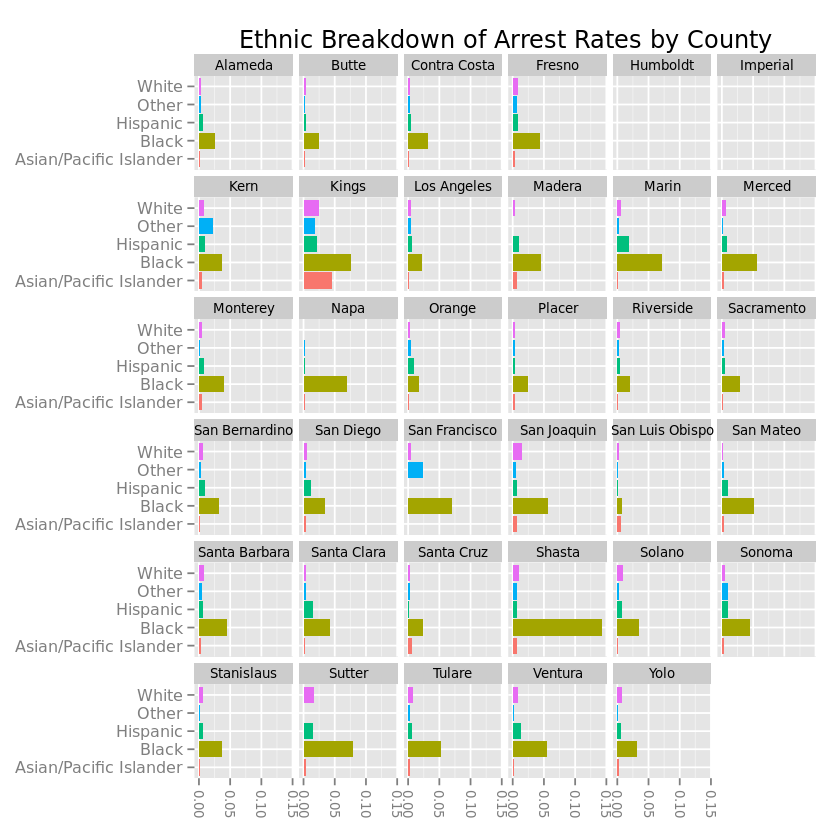

In [221]:
## !! Let's sub out those counties that aren't represented in the arrests file.
dat_joined <- dat_joined[!(dat_joined$county %in% "Alpine" | 
                           dat_joined$county %in% "Amador" |
                           dat_joined$county %in% "Yuba"),]

## Let's remove post-join arrest total NAs from our analysis...for now.
dat_joined <- dat_joined[!is.na(dat_joined$total),]

## Now, let's try that first panel plot, but normalized by population.
plot_ethnic_norm <- ggplot(dat_joined[!(dat_joined$race_or_ethnicity %in% "Native American"),], 
                        aes(x = race_or_ethnicity, y = total/population, fill = race_or_ethnicity), na.rm=T) + 
                        geom_bar(stat = "identity") + coord_flip() + facet_wrap(~county) +  
                        theme(axis.text.x=element_text(angle=-90,hjust=1,vjust=0.5, size = 8), axis.text.x=element_text(size = 8),
                        legend.position = "none", strip.text=element_text(size = 8), axis.title.x=element_blank(),
                        axis.title.y=element_blank()) +
                        ggtitle("Ethnic Breakdown of Arrest Rates by County")

## !! Looks like I'll need to address some out of bound issues when it comes to the Y (see warning).
plot_ethnic_norm

In [222]:
## Add a column just for arrest rate by ethnic population per county.
dat_joined$eth_arrest_rate <- round((dat_joined$total)/(dat_joined$population),5)

## Subset to an ethnic group.
#dat_joined_eth <- dat_joined[dat_joined$race_or_ethnicity %in% "Hispanic",]
dat_joined_eth <- dat_joined[dat_joined$race_or_ethnicity %in% "Black",]
#dat_joined_eth <- dat_joined[dat_joined$race_or_ethnicity %in% "White",]
#dat_joined_eth <- dat_joined[dat_joined$race_or_ethnicity %in% "Asian/Pacific Islander",]
#dat_joined_eth <- dat_joined[dat_joined$race_or_ethnicity %in% "Other",]

## Add a column for probability of seeing that arrest rate.
dat_joined_eth$rate_prob <- round(pnorm(dat_joined_eth$eth_arrest_rate, mean(dat_joined_eth$eth_arrest_rate, na.rm = T), 
                              sd(dat_joined_eth$eth_arrest_rate, na.rm = T), lower.tail = FALSE, log.p = FALSE), 5)

## View it all..
dat_joined_eth

,county,year,race_or_ethnicity,total,gender,age_group,population,eth_arrest_rate,rate_prob
1,Alameda,2014,Black,1011,All Combined,Juvenile,38223,0.02645,0.76699
2,Butte,2014,Black,17,All Combined,Juvenile,684,0.02485,0.78596
3,Contra Costa,2014,Black,747,All Combined,Juvenile,23441,0.03187,0.6963
4,Fresno,2014,Black,592,All Combined,Juvenile,13365,0.04429,0.50827
5,Kern,2014,Black,479,All Combined,Juvenile,12776,0.03749,0.61435
6,Kings,2014,Black,103,All Combined,Juvenile,1354,0.07607,0.10733
7,Los Angeles,2014,Black,3861,All Combined,Juvenile,175483,0.022,0.81743
8,Madera,2014,Black,30,All Combined,Juvenile,657,0.04566,0.48658
9,Marin,2014,Black,74,All Combined,Juvenile,1032,0.07171,0.14281
10,Merced,2014,Black,118,All Combined,Juvenile,2077,0.05681,0.31694


In [224]:
## Calculate z-scores per rate probability.
dat_joined_eth$z_score <- qnorm(dat_joined_eth$rate_prob, lower.tail = FALSE, log.p = FALSE)

## Now, show only those counties whose z-scores are higher than 2...
## ------------------------------------------------------------------

## I.E. These are the counties whose arrest rates of the given ethnicity are statistical 'outliers' 
## among those of their California peer counties. Put another way, their exhibited arrest rates
## have a very low probability of happening purely by chance.
dat_joined_eth[dat_joined_eth$z_score >= 2,]

## IF using t-distribution
## dat_joined_eth[dat_joined_eth$t_score >= 2,]

,county,year,race_or_ethnicity,total,gender,age_group,population,eth_arrest_rate,rate_prob,z_score
1,Shasta,2014,Black,58,All Combined,Juvenile,404,0.14356,4e-05,3.9444



	Shapiro-Wilk normality test

data:  dat_joined_eth$rate_prob
W = 0.9422, p-value = 0.07887


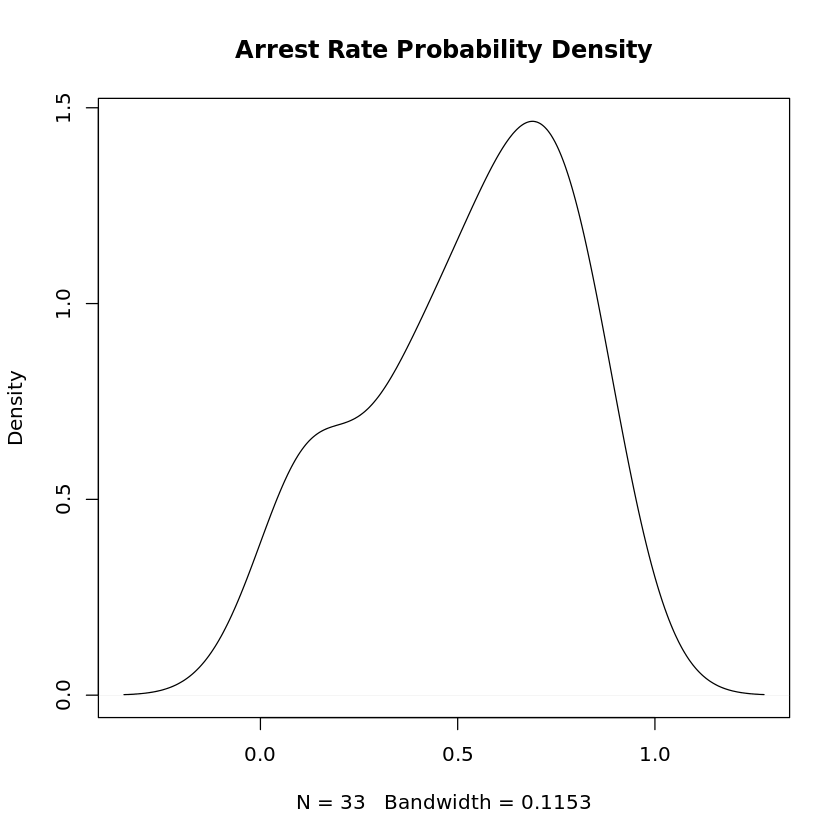

In [225]:
## Given the high number of '0' total arrests for the given ethnic group (and consequent 81% probabilities),
## I have to wonder if we're indeed working with a normal distribution, so let's test that.

## Plot the density
plot(density(dat_joined_eth$rate_prob), main = "Arrest Rate Probability Density")

## Test for difference between observed distribution and normal distribution (Shapiro-Wilk normality test). 
## If difference's p is < .05, then the observed distribution is not sufficiently normal.
shapiro.test(dat_joined_eth$rate_prob)

In [226]:
## Ok, great. The distribution problem has been fixed, and our stats are now correct.
## Granted, our population of usable county cases has shrunk by about 40%, but hey,
## it's more important to be accurate here. 

## I'll be extending this to the other ethnic groups and scaling this over the span
## of years we have arrest data for (I believe that's 2005-2014). Then, we'll apply
## this analysis to agencies, too.